In [40]:
import os
import sys
import numpy as np
import torch

import matplotlib.pyplot as plt
%matplotlib inline

from pcdet.models.backbones_2d.map_to_rv.range_projection import SphereProjection
from pcdet.utils.common_utils import create_logger
from pathlib import Path
from pcdet.config import cfg, cfg_from_yaml_file

# KITTI

In [28]:
from pcdet.datasets.kitti.kitti_dataset import KittiDataset

In [29]:
data_path = Path('/mnt/nas/DATA/KITTI/KITTI')
cfg_file = '/home/jianyun/WorkSpace/pythonProjects/OpenPCDet/tools/cfgs/dataset_configs/kitti_dataset.yaml'

class_names = ['Car', 'Pedestrian', 'Cyclist']
cfg_from_yaml_file(cfg_file, cfg)

logger = create_logger()
# use val set, no aug for statistic!
kitti_dataset = KittiDataset(cfg, class_names=class_names, root_path=data_path, logger=logger, training=False)


2021-07-27 16:32:39,279   INFO  Loading KITTI dataset
2021-07-27 16:32:39,279   INFO  Loading KITTI dataset
2021-07-27 16:32:39,279   INFO  Loading KITTI dataset
2021-07-27 16:32:39,403   INFO  Total samples for KITTI dataset: 3769
2021-07-27 16:32:39,403   INFO  Total samples for KITTI dataset: 3769
2021-07-27 16:32:39,403   INFO  Total samples for KITTI dataset: 3769


In [31]:
minmax = [] # rMin, thetaMin, phiMin, rMax, thetaMax, phiMax
for i, data_dict in enumerate(kitti_dataset):
    sys.stdout.write(f'\rprocessing {i}/{len(kitti_dataset)}')
    points = data_dict['points']
    xyz = torch.from_numpy(points[:, 0:3])
    
    rThetaPhi = SphereProjection.xyz_to_rThetaPhi(xyz).numpy()
    rtp_min = rThetaPhi.min(axis=0)
    rtp_max = rThetaPhi.max(axis=0)
    minmax.append(list(rtp_min) +  list(rtp_max))
    
#     break
    

processing 3768/3769

In [50]:
minmax = np.array(minmax)
minmax[:, [1,2,4,5]]*=57.3
minmax

array([[  6.5083942, -40.011524 ,  -2.7804303,  69.86134  ,  40.3722   ,
         14.643826 ],
       [  6.157476 , -39.135555 ,  -3.8645384,  70.366714 ,  39.198673 ,
         14.66748  ],
       [  6.5847845, -40.051815 ,  -2.7383685,  70.836586 ,  41.01693  ,
         14.652422 ],
       ...,
       [  5.8247685, -40.16611  ,  -2.8802934,  61.058537 ,  40.723312 ,
         14.63296  ],
       [  6.234944 , -39.96766  ,  -2.359081 ,  77.40075  ,  40.891064 ,
         14.6583805],
       [  6.60511  , -39.93148  ,  -2.6747818,  72.99469  ,  40.834    ,
         14.681561 ]], dtype=float32)

In [56]:
titles = ['rMin', 'thetaMin', 'phiMin', 'rMax', 'thetaMax', 'phiMax']

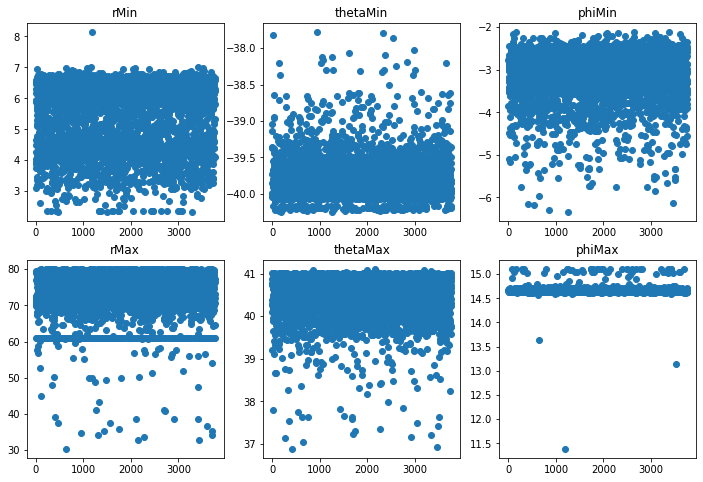

In [64]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

for i, row in enumerate(ax):
    for j, col in enumerate(row):
        col.scatter(range(minmax.shape[0]), minmax[:, i*3+j])
        col.title.set_text(titles[i*3+j])
        

#### 分布

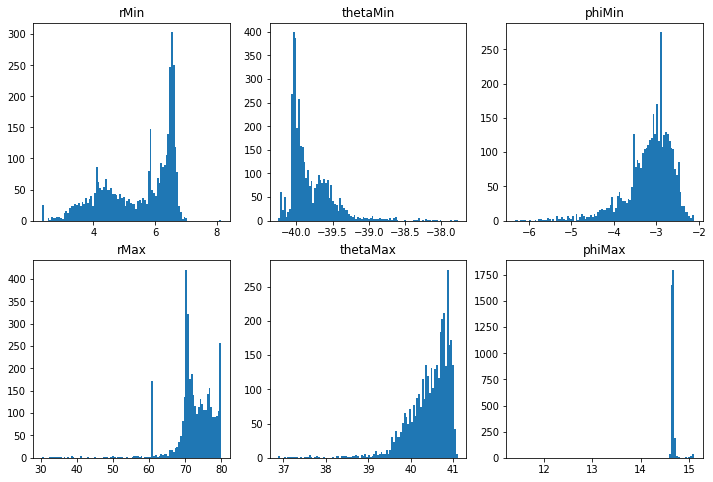

In [65]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

for i, row in enumerate(ax):
    for j, col in enumerate(row):
        col.hist(minmax[:, i*3+j], bins=100)
        col.title.set_text(titles[i*3+j])

> HFOV：(-41, 41); VFOV: (-5, 15)